In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
data.isnull().mean()*100


Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.2)

In [40]:
x_train['age_imputed']=x_train['Age']
x_test['age_imputed']=x_test['Age']

In [41]:
x_train['age_imputed'][x_train['age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['age_imputed'][x_test['age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_2112\1223388273.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['age_imputed'][x_train['age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C:\Us

<Axes: ylabel='Density'>

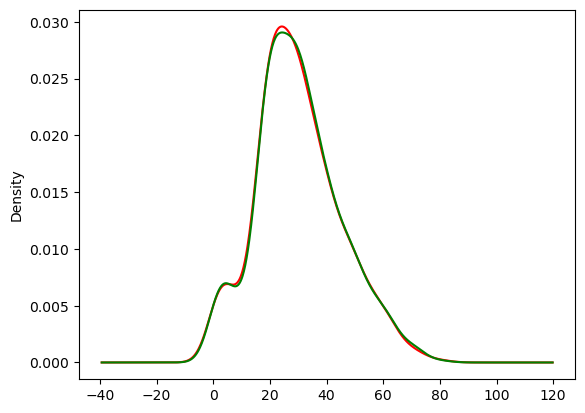

In [44]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Age'].plot(kind='kde',color='red',ax=ax)
x_train['age_imputed'].plot(kind='kde',color='green',ax=ax)

In [46]:
print('original variable variance:',x_train['Age'].var())
print('variance after random imputation:',x_train['age_imputed'].var())

original variable variance: 217.83936525632865
variance after random imputation: 219.71332684441157


In [52]:
df=pd.read_csv('house-train.csv',usecols=['FireplaceQu','GarageQual','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [54]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [58]:
x=df
y=df['SalePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [76]:
x_train['gar_imputed']=x_train['GarageQual']
x_test['gar_imputed']=x_test['GarageQual']
x_train['fir_imputed']=x_train['FireplaceQu']
x_test['fir_imputed']=x_test['FireplaceQu']

In [96]:
x_train['gar_imputed'][x_train['gar_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['gar_imputed'][x_test['gar_imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values
x_train['fir_imputed'][x_train['fir_imputed'].isnull()]=x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['fir_imputed'][x_test['fir_imputed'].isnull()]=x_test['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp\ipykernel_2112\3054568354.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['gar_imputed'][x_train['gar_imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()

In [99]:
temp=pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['gar_imputed'].value_counts()/len(x_train)
    
],axis=1)
temp.columns=['original','imputed']
temp

,original,imputed
TA,0.950342,0.950342
Fa,0.035959,0.035959
Gd,0.009418,0.009418
Po,0.002568,0.002568
Ex,0.001712,0.001712


In [100]:
temp=pd.concat([
    x_train['FireplaceQu'].value_counts()/len(x_train['FireplaceQu'].dropna()),
    x_train['fir_imputed'].value_counts()/len(x_train)
    
],axis=1)
temp.columns=['original','imputed']
temp

,original,imputed
Gd,0.487685,0.484589
TA,0.410509,0.410959
Fa,0.044335,0.046233
Ex,0.029557,0.029110
Po,0.027915,0.029110


In [104]:
len(x_train['GarageQual'].dropna())

1168

In [103]:
len(x_train)

1168